In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft
from scipy.integrate import odeint

$$u_t -0.0001 u_{xx}+5u^3-5u=0\\u(x,0) = x^2\cos(\pi x)\\(x,t)\in[-1,1]\times[0,1]$$

In [2]:
#Allen Cahn
L    = 2
nx   = 30
nt = 31
nu    = 0.0001       # use same value as the exact solution above
tend = 1            # use same value as the exact solution above

#---------- solution domain, initial condition

dx = L/nx     # not L/(nx-1)
x = np.linspace(-1, -1+L-dx, nx)
sol = []

u0 = x**2*np.cos(2*np.pi*x/L)
sol.append(u0)
#---------- solve the problem and plot

def rhsf(u, t):
    N = len(u)
    n = np.arange(N); n[int(N/2)+1:]-= N
    return -(5*u**3).real+(5*u).real - nu*ifft((2*np.pi*n/L)**2*fft(u)).real

ts = np.linspace(0,tend,nt)
for i in range(nt-1):
    t = np.linspace(0,ts[i+1],30)
    y = odeint(rhsf, u0, t)
    sol.append(y[-1,:])
sol = np.array(sol,dtype = np.float64)

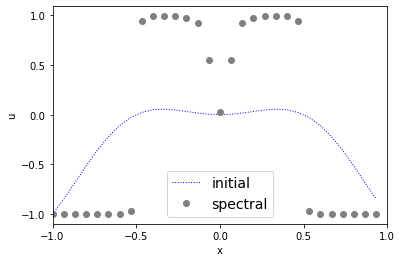

In [3]:
fig,ax=plt.subplots()
ax.plot(x,u0, ':', color='blue', lw=1)
# ax.plot(xe,ye, '-', color='red', lw=2)
ax.plot(x,y[-1,:], 'o', color='gray', lw=1)
    
plt.rc('font', size=14)
plt.gca().set_xlim([-1,1])
plt.xlabel('x')
plt.ylabel(r'u');
plt.legend(['initial', 'spectral'], frameon=True);

In [4]:

def plot_helper_2d(nx  = 60, nt = 60):#inputs,outputs
    """2 dimensional plot helper"""
    x_show = np.linspace(-1,1,nx).flatten()
#     outputs = outputs.reshape(-1,512)
    fg_color = 'black'
    bg_color = 'white'
    lb = int(np.min(Exact)-1)-0.3
    ub = int(np.max(Exact)+1)+0.3
    
        #outputs = outputs.T
        #print('x_show=:' , x_show)
        #print('outputs = ',outputs)
    fig, axs = plt.subplots(3,2,figsize = (15,15))
    fig.suptitle('6 snapshots for result',fontsize = 20,color='black')

    axs[0,0].plot(x_show,Exact[int(nx*0):int(nx*0)+1,:].flatten(),'b', label = 't=0.00 true',linewidth=3)#,alpha=2.0
#     axs[0,0].plot(x_show,outputs[int(nx*0):int(nx*0)+1,:].flatten(),'r--', label = 't=0.00 pred',linewidth=3)
    axs[0,0].set_xlabel('$x$',fontsize = 15,color=fg_color)
    axs[0,0].set_ylabel('$u(x,0.0)$',fontsize = 15,color=fg_color)
    axs[0,0].grid()
    axs[0,0].tick_params(labelsize= 12)
    axs[0,0].legend(loc=2,fontsize = 15)
    axs[0,0].set_ylim([lb,ub])




    axs[0,1].plot(x_show,Exact[int(nx*0.2):int(nx*0.2)+1,:].flatten(),'b',label = 't=0.20 true',linewidth=3)
#     axs[0,1].plot(x_show,outputs[int(nx*0.2):int(nx*0.2)+1,:].flatten(),'r--',label = 't=0.20 pred',linewidth=3)
    axs[0,1].set_xlabel('$x$',fontsize = 15,color=fg_color)
    axs[0,1].set_ylabel('$u(x,0.2)$',fontsize = 15,color=fg_color)
    axs[0,1].grid()
    axs[0,1].tick_params(labelsize= 12)
    axs[0,1].legend(loc=2,fontsize = 15)
    axs[0,1].set_ylim([lb,ub])


    axs[1,0].plot(x_show,Exact[int(nx*0.4):int(nx*0.4)+1,:].flatten(),'b',label = 't=0.40 true',linewidth=3)
#     axs[1,0].plot(x_show,outputs[int(nx*0.4):int(nx*0.4)+1,:].flatten(),'r--',label = 't=0.40 pred',linewidth=3)
    axs[1,0].set_xlabel('$x$',fontsize = 15,color=fg_color)
    axs[1,0].set_ylabel('$u(x,0.4)$',fontsize = 15,color=fg_color)
    axs[1,0].grid()
    axs[1,0].tick_params(labelsize= 12)
    axs[1,0].legend(loc=1,fontsize = 15)
    axs[1,0].set_ylim([lb,ub])


    axs[1,1].plot(x_show,Exact[int(nx*0.6):int(nx*0.6)+1,:].flatten(),'b',label = 't=0.60 true',linewidth=3)
#     axs[1,1].plot(x_show,outputs[int(nx*0.6):int(nx*0.6)+1,:].flatten(),'r--',label = 't=0.60 pred',linewidth=3)
    axs[1,1].set_xlabel('$x$',fontsize = 15,color=fg_color)
    axs[1,1].set_ylabel('$u(x,0.6)$',fontsize = 15,color=fg_color)
    axs[1,1].grid()
    axs[1,1].tick_params(labelsize= 12)
    axs[1,1].legend(loc=2,fontsize = 15)
    axs[1,1].set_ylim([lb,ub])
    
    axs[2,0].plot(x_show,Exact[int(nx*0.8):int(nx*0.8)+1,:].flatten(),'b',label = 't=0.80 true',linewidth=3)
#     axs[2,0].plot(x_show,outputs[int(nx*0.8):int(nx*0.8)+1,:].flatten(),'r--',label = 't=0.80 pred',linewidth=3)
    axs[2,0].set_xlabel('$x$',fontsize = 15,color=fg_color)
    axs[2,0].set_ylabel('$u(x,0.8)$',fontsize = 15,color=fg_color)
    axs[2,0].grid()
    axs[2,0].tick_params(labelsize= 12)
    axs[2,0].legend(loc=2,fontsize = 15)
    axs[2,0].set_ylim([lb,ub])
    
    axs[2,1].plot(x_show,Exact[int(nx*1):int(nx*1)+1,:].flatten(),'b',label = 't=1.00 true',linewidth=3)
#     axs[2,1].plot(x_show,outputs[int(nx*1):int(nx*1)+1,:].flatten(),'r--',label = 't=1.00 pred',linewidth=3)
    axs[2,1].set_xlabel('$x$',fontsize = 15,color=fg_color)
    axs[2,1].set_ylabel('$u(x,1.0)$',fontsize = 15,color=fg_color)
    axs[2,1].grid()
    axs[2,1].tick_params(labelsize= 12)
    axs[2,1].legend(loc=2,fontsize = 15)
    axs[2,1].set_ylim([lb,ub])
    #plt.grid()
    #plt.legend(loc = 1, fontsize = 15)
    fig.patch.set_facecolor(bg_color)
    plt.show()

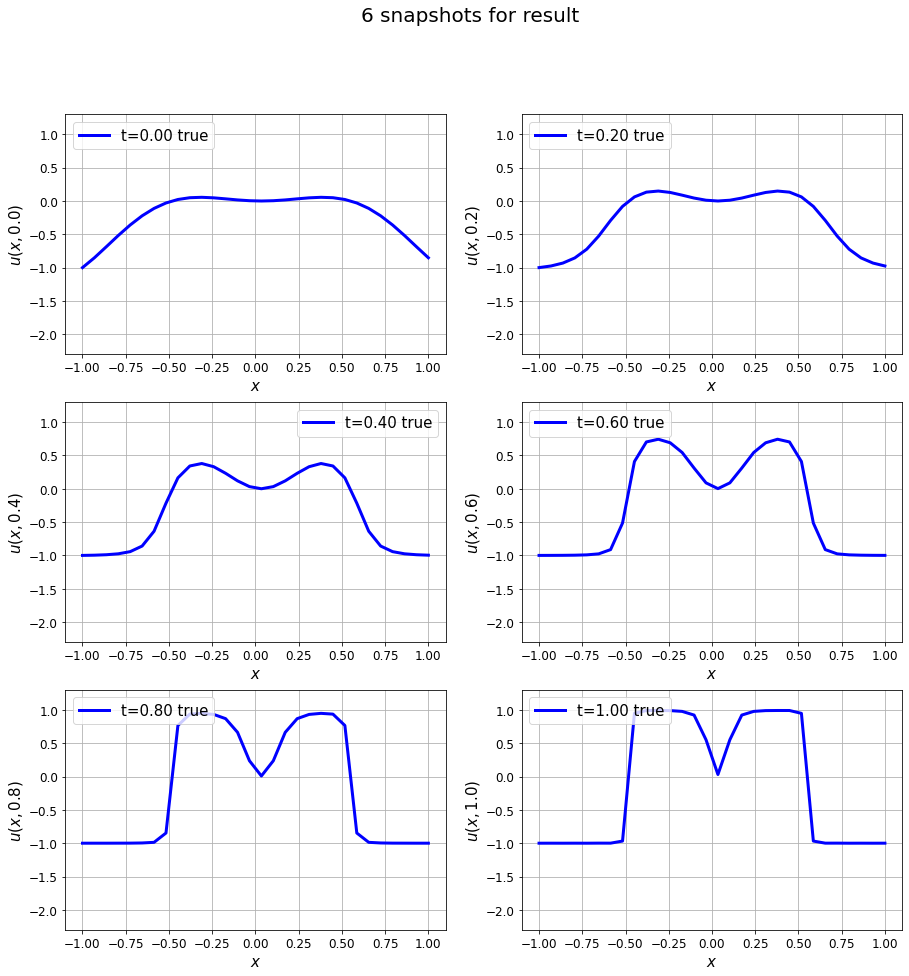

In [5]:
Exact = sol
plot_helper_2d(nx = nx, nt = nt)

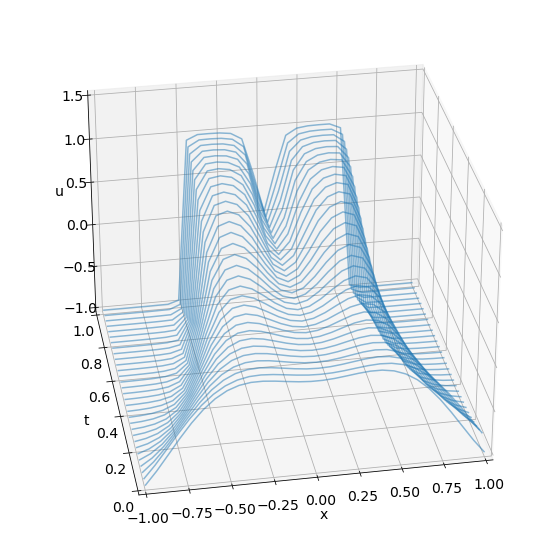

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from numpy import pi,cosh,exp,cos,round,zeros,arange,real
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure
xs = np.linspace(-1,1,nx)
ts = np.linspace(0,1,nt)
#Xs, Ts = np.meshgrid(xs, ts)
udata = []
tmax = 1
u0 = xs**2*cos(pi*xs)
udata.append(list(zip(xs,u0)))
tdata = [0.0]

for i in range(nt-1):
    udata.append(list(zip(xs,sol.flatten()[i*nx:(i+1)*nx])))
    tdata.append(ts[i+1])
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
poly = LineCollection(udata)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('x')
ax.set_xlim3d(-1, 1)
ax.set_ylabel('t')
ax.set_ylim3d(0, tmax)
ax.set_zlabel('u')
ax.set_zlim3d(-1, 1.5)
ax.view_init(30,-100);

In [7]:
# 저장하기
import sys
import scipy.io
save_str = f"../data/{nu}_AC({nx}_by_{nt}).mat"
save_dic = {'Exact':Exact}
scipy.io.savemat(save_str,save_dic)

In [9]:
# 불러오기
data = scipy.io.loadmat(f"../data/{nu}_AC({nx}_by_{nt}).mat")
table = data['Exact']
# print(table)